In [1]:
 %matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

#  Reflect Tables into SQLAlchemy ORM

In [10]:
 # Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [20]:
 # create engine to hawaii.sqlite
engine = create_engine("sqlite:///hawaii.sqlite", echo = False)

In [5]:
 # reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect = True)

In [6]:
 # View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
 # Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
 # Create our session (link) from Python to the DB
session = Session(engine)


In [15]:
engine.execute('SELECT * FROM measurement LIMIT 5').fetchall()

[(1, 'USC00519397', '2010-01-01', 0.08, 65.0),
 (2, 'USC00519397', '2010-01-02', 0.0, 63.0),
 (3, 'USC00519397', '2010-01-03', 0.0, 74.0),
 (4, 'USC00519397', '2010-01-04', 0.0, 76.0),
 (5, 'USC00519397', '2010-01-06', None, 73.0)]

In [19]:
#Use inspector to familiarize self with data types in measurement table
inspector = inspect(engine)
m_columns = inspector.get_columns('measurement')
for c in m_columns:
    print(c['name'], c['type'])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [16]:
engine.execute('SELECT * FROM station LIMIT 5').fetchall()

[(1, 'USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0),
 (2, 'USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6),
 (3, 'USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0),
 (4, 'USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9),
 (5, 'USC00518838', 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 306.6)]

In [18]:
#Use inspector to familiarize self with data types in station table
inspector = inspect(engine)
s_columns = inspector.get_columns('station')
for c in s_columns:
    print(c['name'], c['type'])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


#  Exploratory Precipitation Analysis

In [22]:
# Find the most recent date in the data set.
session.query(Measurement.date).order_by(Measurement.date.desc()).first()

('2017-08-23')

In [25]:
 # Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
# Calculate the date one year from the last date in data set.
query_date = dt.date(2017, 8, 23) - dt.timedelta(days = 365)
print('Query Date:', query_date)


Query Date: 2016-08-23


In [68]:
# Perform a query to retrieve the data and precipitation scores
sel = [Measurement.date, Measurement.prcp]
results = session.query(*sel).\
    filter(func.strftime(Measurement.date >= query_date)).\
    group_by(Measurement.date).all()
results


[('2016-08-23', 0.0),
 ('2016-08-24', 0.08),
 ('2016-08-25', 0.08),
 ('2016-08-26', 0.0),
 ('2016-08-27', 0.0),
 ('2016-08-28', 0.01),
 ('2016-08-29', 0.0),
 ('2016-08-30', 0.0),
 ('2016-08-31', 0.13),
 ('2016-09-01', 0.0),
 ('2016-09-02', 0.0),
 ('2016-09-03', 0.0),
 ('2016-09-04', 0.03),
 ('2016-09-05', None),
 ('2016-09-06', None),
 ('2016-09-07', 0.05),
 ('2016-09-08', 0.0),
 ('2016-09-09', 0.03),
 ('2016-09-10', 0.0),
 ('2016-09-11', 0.05),
 ('2016-09-12', 0.0),
 ('2016-09-13', 0.02),
 ('2016-09-14', 1.32),
 ('2016-09-15', 0.42),
 ('2016-09-16', 0.06),
 ('2016-09-17', 0.05),
 ('2016-09-18', 0.0),
 ('2016-09-19', 0.0),
 ('2016-09-20', 0.0),
 ('2016-09-21', 0.0),
 ('2016-09-22', 0.02),
 ('2016-09-23', 0.0),
 ('2016-09-24', 0.0),
 ('2016-09-25', 0.0),
 ('2016-09-26', 0.06),
 ('2016-09-27', 0.02),
 ('2016-09-28', 0.0),
 ('2016-09-29', 0.0),
 ('2016-09-30', 0.0),
 ('2016-10-01', 0.0),
 ('2016-10-02', 0.0),
 ('2016-10-03', 0.0),
 ('2016-10-04', 0.0),
 ('2016-10-05', 0.0),
 ('2016-10-06'

In [52]:
# Save the query results as a Pandas DataFrame and set the index to the date column
precip =pd.DataFrame(results, columns = ['Date', 'Precipitation'])
precip.set_index('Date', inplace =True)
precip

,Precipitation
Date,
2016-08-23,0.00
2016-08-24,0.08
2016-08-25,0.08
2016-08-26,0.00
2016-08-27,0.00
...,...
2017-08-19,0.00
2017-08-20,0.00
2017-08-21,0.00


In [ ]:
# Sort the dataframe by date

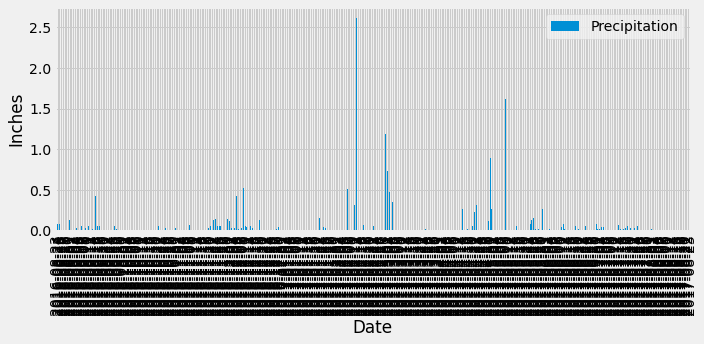

In [72]:
 # # Use Pandas Plotting with Matplotlib to plot the data
precip.plot.bar()
#xticks = '2016-08-23', '2016-10-01','2016-11-09','2-16-12-19','2017-01-28','2017-03-09','2017-04-18','2017-05-31','2017-07-10')
plt.ylabel('Inches')
plt.xlabel('Date')
plt.xticks(rotation=90)
plt.tight_layout()
#plt.rcParams['figure.figsize'] = [10, 5]
plt.savefig('precipitation.png')
plt.show()

In [74]:
#Use Pandas to calcualte the summary statistics for the precipitation data
precip.describe()

,Precipitation
count,364.000000
mean,0.048709
std,0.204930
min,0.000000
25%,0.000000
50%,0.000000
75%,0.020000
max,2.620000


# Exploratory Station Analysis

In [75]:
 # Design a query to calculate the total number stations in the dataset
total = session.query(func.count(Measurement.station)).all()
total

[(19550)]

In [104]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)

# List the stations and the counts in descending order.
# sel_station = [Measurement.station,Measurement.tobs]
# station_list = session.query(Measurement.station).\
#     filter(Measurement.station)groupby(Meaurement.station).all()
# station_list
station_list = set([station.stations for station in session.query(Measurement.station)])
station_list
# for station in station_list:
#     print(station.station)
# # station_list 

AttributeError: 'result' object has no attribute 'stations'

In [ ]:
 # Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.

In [ ]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

# Close session

In [ ]:
 # Close Session
session.close()